In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
# loading the dataset to a Pandas DataFrame
Fraud_data = pd.read_csv('D:\Video\Machine Learning\Fraud.csv')

In [3]:
# first 5 rows of the dataset
Fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
Fraud_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# dataset informations
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
Fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [58]:
# label encoding
Fraud_data['type'].value_counts()

1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

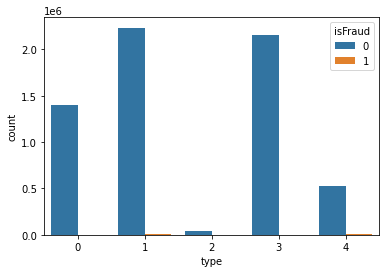

In [59]:
# education & Loan Status
sns.countplot(x='type', hue='isFraud', data=Fraud_data)

In [ ]:
#CASH_IN --> 0
#CASH_OUT -->1 
#DEBIT -->2
#PAYMENT -->3
#TRANSFER -->4

In [16]:
Fraud_data.replace({'type':{'CASH_IN':0,'CASH_OUT':1, 'DEBIT':2, 'PAYMENT':3, 'TRANSFER':4}},inplace=True)

In [17]:
Fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
# distribution of legit transactions & fraudulent transactions
Fraud_data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
# 0 --> Normal transaction
# 1 --> Fraudulent transaction

In [19]:
#separating the data for data analysis
legit = Fraud_data[Fraud_data.isFraud == 0]
fraud = Fraud_data[Fraud_data.isFraud == 1]

In [20]:
print(legit.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [21]:
#statistical measure of the data
legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [22]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [23]:
# compare the values for both transactions
Fraud_data.groupby('isFraud').mean()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,
0,243.235663,1.713139,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,2.496530,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [24]:
#Under-Sampling
legit_sample = legit.sample(n=8213)

In [25]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [26]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4453334,323,1,266383.25,C2102055122,1944.0,0.0,C1804876644,710395.66,976778.90,0,0
5783492,400,1,136915.71,C1344382933,0.0,0.0,C1894510591,10005672.75,10142588.46,0,0
35342,9,4,131871.86,C150395308,0.0,0.0,C259443926,205483.00,337354.86,0,0
4485447,324,1,46303.31,C1782435479,0.0,0.0,C470387990,429743.26,476046.58,0,0
879179,42,1,101256.20,C172430902,1676.0,0.0,C825828435,83732.45,108807.82,0,0


In [27]:
new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,1,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,1,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [28]:
new_dataset['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [29]:
new_dataset.groupby('isFraud').mean()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,
0,244.356751,1.707537,1.843843e+05,8.180399e+05,841528.036038,1.122994e+06,1.251416e+06,0.000000
1,368.413856,2.496530,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [32]:
#Splitting the data into Features & Targets

x = new_dataset.drop(['isFraud','nameOrig', 'nameDest'], axis=1)
y = new_dataset['isFraud']

In [33]:
print(x)

         step  type      amount  oldbalanceOrg  newbalanceOrig  \
4453334   323     1   266383.25        1944.00             0.0   
5783492   400     1   136915.71           0.00             0.0   
35342       9     4   131871.86           0.00             0.0   
4485447   324     1    46303.31           0.00             0.0   
879179     42     1   101256.20        1676.00             0.0   
...       ...   ...         ...            ...             ...   
6362615   743     1   339682.13      339682.13             0.0   
6362616   743     4  6311409.28     6311409.28             0.0   
6362617   743     1  6311409.28     6311409.28             0.0   
6362618   743     4   850002.52      850002.52             0.0   
6362619   743     1   850002.52      850002.52             0.0   

         oldbalanceDest  newbalanceDest  isFlaggedFraud  
4453334       710395.66       976778.90               0  
5783492     10005672.75     10142588.46               0  
35342         205483.00       337

In [34]:
print(y)

4453334    0
5783492    0
35342      0
4485447    0
879179     0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 16426, dtype: int64


In [35]:
#split data into training & testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [36]:
print(x.shape, x_train.shape, x_test.shape)

(16426, 8) (13140, 8) (3286, 8)


In [40]:
#Model training

model = LogisticRegression()

In [42]:
#traing the logistic Regression model with training data
model.fit(x_train, y_train)

LogisticRegression()

In [48]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [49]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9084474885844749


In [51]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [52]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9050517346317711


In [65]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
rfc= RandomForestClassifier()

rfc.fit(x_train, y_train)
y_pred_rfc= rfc.predict(x_test)
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred_rfc)}")

Confusion Matrix: 
 [[1624   19]
 [   9 1634]]


In [68]:
print(f"Classification Report: \n {classification_report(y_test, y_pred_rfc)}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1643
           1       0.99      0.99      0.99      1643

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

